<a href="https://colab.research.google.com/github/ppalande1903/CodSoft/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
churn=pd.read_csv('/content/Churn_Modelling 3.csv')

In [ ]:
churn.columns=churn.columns.str.strip()

In [ ]:
churn.columns=churn.columns.str.lower()

In [10]:
churn.isna().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [11]:
churn[churn.duplicated(subset=['customerid'],keep=False)]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


<Axes: xlabel='exited', ylabel='count'>

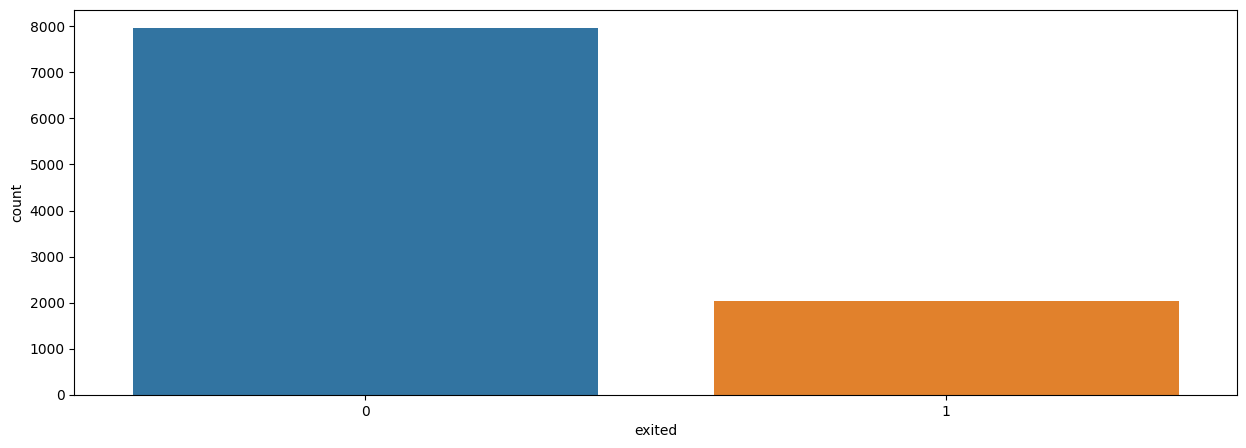

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn,x='exited')

In [13]:
from sklearn.utils import resample

In [15]:
churn_majority=churn[churn['exited']==0]
churn_minority=churn[churn['exited']==1]

In [16]:
churn_majority_downsample=resample(churn_majority,n_samples=2037,replace=False,random_state=42)

In [17]:
churn_df=pd.concat([churn_majority_downsample,churn_minority])

In [18]:
churn_df.drop(['rownumber', 'customerid', 'surname','geography','gender'],axis=1,inplace=True)

<Axes: >

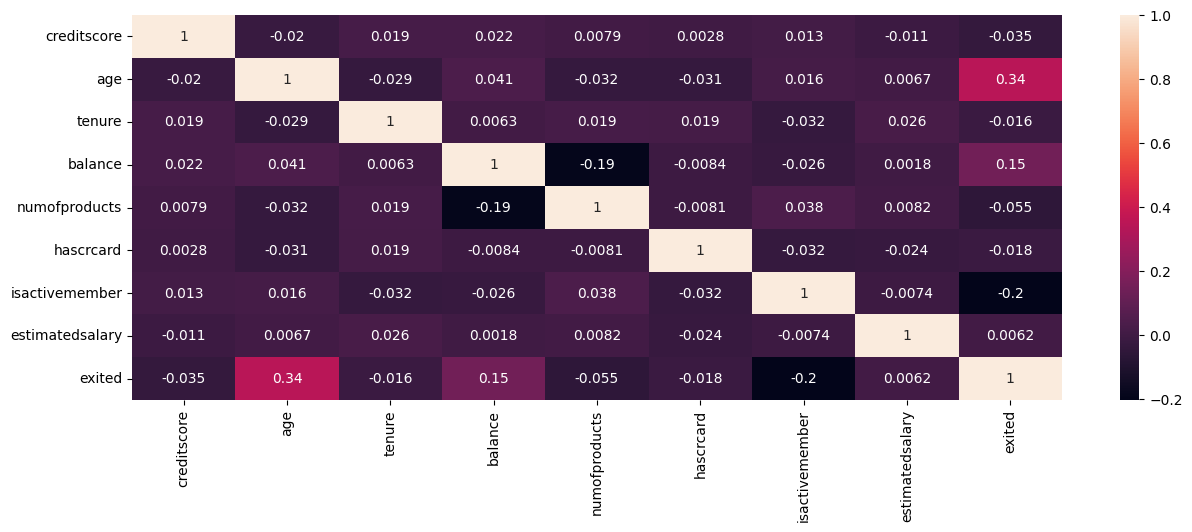

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(churn_df.corr(),annot=True)

In [21]:
x=churn_df.drop(['exited'],axis=1)
y=churn_df['exited']


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [24]:
lr.score(x_train,y_train)
lr.score(x_test,y_test)
y_pred=lr.predict(x_test)


In [25]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)
accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)

0.6575342465753424

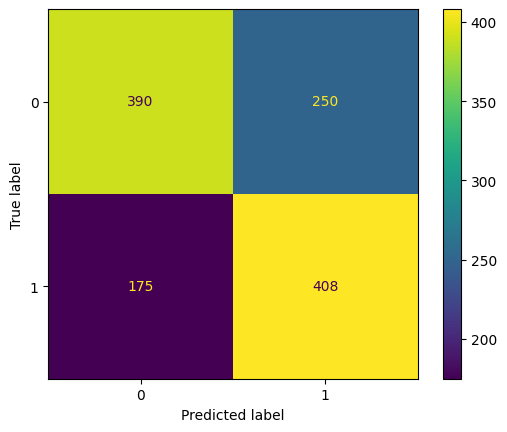

In [26]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()